1) 이미지 처리
2) 이미지 필터링
3) 이미지 변환
4) 이미지 특징 추출

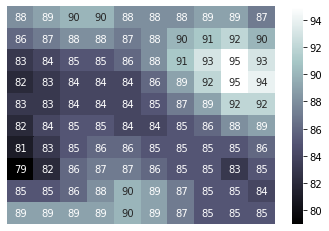

In [8]:
#1) 이미지 처리
import cv2
import matplotlib.pylab as plt
import seaborn as sns
img = cv2.imread("c:\\opencv_test\\1.jpg")
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sns.heatmap(img_gray[:10,:10], annot = True, fmt = "d",cmap = plt.cm.bone)
plt.axis("off")
plt.show()

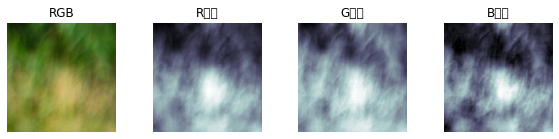

In [18]:
#1-2) 이미지 처리에서 이미지호출
from sklearn.datasets import load_sample_images
import cv2
import matplotlib.pylab as plt
import seaborn as sns

img = cv2.imread("c:\\opencv_test\\1.jpg")
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.figure(figsize = (10,2))

#채널이 없을 경우 RGB
plt.subplot(141)
plt.imshow(img_rgb[50:200,50:200,:])
plt.axis("off")
plt.title("RGB")

plt.subplot(142)
plt.imshow(img_rgb[50:200,50:200,0],cmap = plt.cm.bone)
plt.axis("off")
plt.title("R채널")

plt.subplot(143)
plt.imshow(img_rgb[50:200,50:200,1],cmap = plt.cm.bone)
plt.axis("off")
plt.title("G채널")

plt.subplot(144)
plt.imshow(img_rgb[50:200,50:200,2],cmap = plt.cm.bone)
plt.axis("off")
plt.title("B채널")

plt.show()

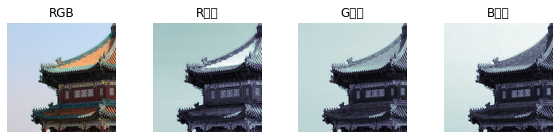

In [17]:
#1-3) 이미지 처리에서 opencv로 이미지 호출 해보자
from sklearn.datasets import load_sample_images
import cv2
import matplotlib.pylab as plt
import seaborn as sns

dataset = load_sample_images()
len(dataset.images)
img_rgb = dataset.images[0]
plt.figure(figsize = (10,2))

#채널이 없을 경우 RGB
plt.subplot(141)
plt.imshow(img_rgb[50:200,50:200,:])
plt.axis("off")
plt.title("RGB")

plt.subplot(142)
plt.imshow(img_rgb[50:200,50:200,0],cmap = plt.cm.bone)
plt.axis("off")
plt.title("R채널")

plt.subplot(143)
plt.imshow(img_rgb[50:200,50:200,1],cmap = plt.cm.bone)
plt.axis("off")
plt.title("G채널")

plt.subplot(144)
plt.imshow(img_rgb[50:200,50:200,2],cmap = plt.cm.bone)
plt.axis("off")
plt.title("B채널")

plt.show()

In [12]:
from sklearn.datasets import load_sample_image
china = load_sample_image('china.jpg')
print(china.dtype)
print(china.shape)

flower = load_sample_image('flower.jpg')
print(flower.dtype)
print(flower.shape)


uint8
(427, 640, 3)
uint8
(427, 640, 3)


Text(0.5, 1.0, 'img_res')

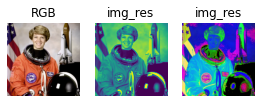

In [26]:
#1-4 scikit-image 패키지모듈의 이미지를 확인
#!pip install scikit-image
import skimage.data
from skimage import color

skimage.__version__
img = skimage.data.astronaut()
img.shape

#채널이 없을 경우 RGB
plt.subplot(141)
plt.imshow(img)
plt.axis("off")
plt.title("RGB")

#이미지를 가져다 저장 후 다시 읽어보자
skimage.io.imsave("astronaut.png",img)
img_res = skimage.io.imread("astronaut.png")

#채널이 없을 경우 RGB
plt.subplot(142)
plt.imshow(color.rgb2gray(img_res))
plt.axis("off")
plt.title("img_res")

#채널이 없을 경우 RGB
plt.subplot(143)
plt.imshow(color.rgb2hsv(img_res))
plt.axis("off")
plt.title("img_res")

In [ ]:
#1-5) 샘플을 저장한 것을 opencv로 호출
import cv2
image = cv2.imread("astronaut.png")
image.shape
#각 채널을 부리해보자.
b,g,r = cv2.split(image)
#b,r 바꾸기
img_rgb = cv2.merge([r,g,b])


2) 이미지 필터링 : 화소 행렬을 다른 값으로 변경하는 것 임계값, 적응임계, 필터링, 블러링, 변환
2-1) threshhold(src,thresh,maxval,type[, dst]) -> retval, dst : 하나의 픽셀값을 기준값을 이용해서 이진화
type   :
THRESH_BINARY    : 기준값을 넘으면 최대값으로 지정하거나 0
THRESH_BINARY_INV : 기준값을 넘으면 0 아니면 최대값
THRESH_TRUNC   : 기준값을 넘으면 기준값 아니면 최대값 ex) 기준값 200, 최대값 150 이미지가 0~180화소라면 150
THRESH_TOZERO   : 기준값을 넘으면 원래값 아니면 0
THRESH_TOZERO_INV  : 기준값을 넘으면 0 아니면 원래값


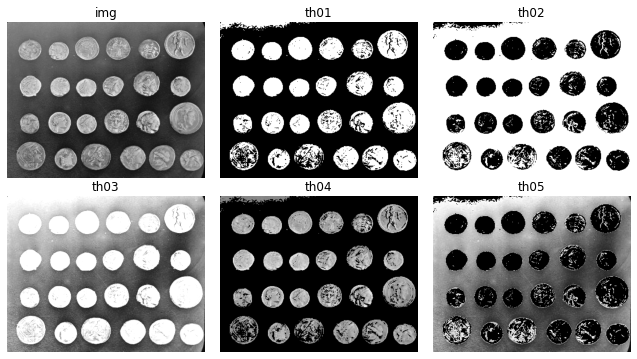

In [29]:
#2-1) threshold를 사용해보자
from sklearn.datasets import load_sample_images
import cv2
import matplotlib.pylab as plt
import seaborn as sns
from skimage.data import coins
from skimage import color

img = coins()
img.shape

maxval = 255
thresh = maxval/2
ret, th01 = cv2.threshold(img,thresh,maxval,cv2.THRESH_BINARY)
ret, th02 = cv2.threshold(img,thresh,maxval,cv2.THRESH_BINARY_INV)
ret, th03 = cv2.threshold(img,thresh,maxval,cv2.THRESH_TRUNC)
ret, th04 = cv2.threshold(img,thresh,maxval,cv2.THRESH_TOZERO)
ret, th05 = cv2.threshold(img,thresh,maxval,cv2.THRESH_TOZERO_INV)

title = ['img', "th01", "th02", "th03", "th04", "th05"]
images = [img, th01, th02, th03, th04, th05]

plt.figure(figsize=(9,5))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(title[i])
    plt.axis("off")
    
plt.tight_layout(pad=0.9)
plt.show()

2-2) adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst]) -> dst
        : 일정한 영역내에서 이웃한 픽셀들을 이용해서 기준값을 자체적으로 계산한다.
        
        adaptiveMethod  :  기준값을 계산하는 방법
                     - ADAPTIVE_THRESH_MEAN_C : 영역내에서 평균값에 C값을 뺀 값을 기준으로 한다.
                     - ADAPTIVE_THRESH_GAUSSIAN_C : 가우시안 블러링을 한 후 C값을 뺀 값을 기준으로 한다.
        thresholdType
                     - THRESH_BINARY : 기준값을 넘으면 최대값으로 지정하거나 0
                     - THRESH_BINARY_INV : 기준값을 넘으면 0 아니면 최대값
        blockSize   : 적용할 임계처리
            
        C : 평균, 가중평균에서 차감할 값

(191, 384)


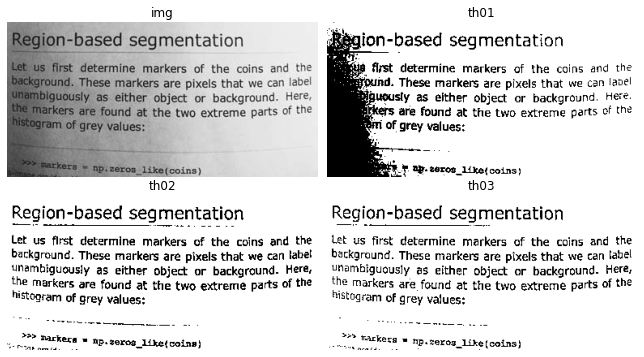

In [38]:
from sklearn.datasets import load_sample_images
import cv2
import matplotlib.pylab as plt
import seaborn as sns
from skimage.data import coins
from skimage.data import page
from skimage import color

img = page()
print(img.shape)  # 191,384
maxvalue = 255
thresh = 126

ret, th01 = cv2.threshold(img,thresh,maxval,cv2.THRESH_BINARY)

blockSize = 15
C = 20

th02 = cv2.adaptiveThreshold(img,maxvalue,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,blockSize, C)

th03 = cv2.adaptiveThreshold(img,maxvalue,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,blockSize, C)

title = ['img', "th01", "th02", "th03"]
images = [img, th01, th02, th03]

plt.figure(figsize=(9,5))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(title[i])
    plt.axis("off")
    
plt.tight_layout(pad=0.9)
plt.show()

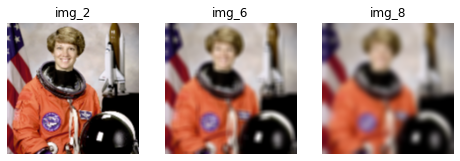

In [42]:
#2-3) 이미지 샘플을 필터링 해보자  #filter2D(src, ddepth, kernel[, dst[, anchor[, borderType]]]) -> dst
# 이미지의 커널 크기가 커지면 이미지가 점점 흐려진다.
# 이미지 필터링은 필터, 커널작업으로 정방행렬 정의 하고 커널을 이동시켜서 같은 이미지와 곱한 결과값
from sklearn.datasets import load_sample_images
import cv2
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
from skimage.data import astronaut

image = astronaut()  #astronaut(512,512,3) uint ndarray
image = cv2.resize(image, dsize = (150,150))

plt.figure(figsize=(8,3))

for i, k in enumerate([2,6,8]):
    kernel = np.ones((k,k)) / k**2
    image = cv2.filter2D(image, -1, kernel = kernel)
    plt.subplot(1,3,i+1)
    plt.imshow(image)
    plt.axis("off")
    plt.title("img_{}".format(k))

2-4) 블러링 작업을 확인 해보자 
 - blur(src, kernel_size) = 픽셀의 평균값으로 균일화 시킨다. 잡음제거, 흑백사진
 - medianBlur(src, kernel_size) = 중간값으로 균일화 시킨다.
 - getGaussianKernel(ksize, sigma[, ktype]) -> retval = 가우시안 블러링
 - GaussianBlur(src, kernal_size, sigmaX)
 - bilateralFilter(src(원본이미지), d(커널크기), sigmaColor(생공간 표준편차),
                   sigmaSpace(거리공간의 표준편차)[, dst[, borderType]]) -> dst -> 양방향 필터

Text(0.5, 1.0, 'img_B')

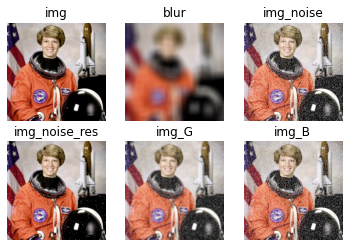

In [71]:
from sklearn.datasets import load_sample_images
import cv2
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
from skimage.data import astronaut

#1. 원본이미지
image = astronaut()

#2. 블러이미지
blur = cv2.blur(image,(50,50))  #(5,5)의 영역의 평균값으로 해당 픽셀을 대처한다.

#3. 잡음 적용 이미지
img_noise = image.copy()
np.random.seed(0)
N = 50000
idx1 = np.random.randint(image.shape[0],size = N)
idx2 = np.random.randint(image.shape[1],size = N)
img_noise [idx1,idx2] = 255

# 잡음 제거를 중앙값으로 블러링 한 이미지
img_noise_res = cv2.medianBlur(img_noise, 3)

#5. 가우시안 블러링을 해보자
img_G = cv2.GaussianBlur(img_noise,(9,9),2)  #원본이미지, 커널크기, 표준편차

#6. bilateralFilter를 사용
img_B = cv2.bilateralFilter(img_noise,9,75,75)

#원본
plt.subplot(231)
plt.imshow(image)
plt.axis("off")
plt.title("img")

#평균 블러
plt.subplot(232)
plt.imshow(blur)
plt.axis("off")
plt.title("blur")

#잡음 이미지
plt.subplot(233)
plt.imshow(img_noise)
plt.axis("off")
plt.title("img_noise")

#잡음제거 이미지
plt.subplot(234)
plt.imshow(img_noise_res)
plt.axis("off")
plt.title("img_noise_res")

#가우시안 이미지
plt.subplot(235)
plt.imshow(img_G)
plt.axis("off")
plt.title("img_G")

#양방향 이미지
plt.subplot(236)
plt.imshow(img_B)
plt.axis("off")
plt.title("img_B")

가우시안 블러링 가우시안 함수 G 를 커널로 사용한다.
가우시안 커널은 가운데 위치(x,y)와 커널 위치 (x+u,y+v)의 거리차이 (u,v)가 클수록 가중치가 작아진다.

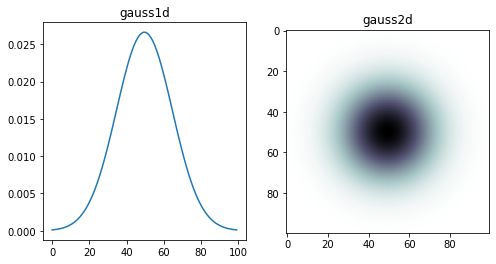

In [66]:
#2-5) 블러링 작업을 해보자
from sklearn.datasets import load_sample_images
import cv2
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
from skimage.data import astronaut

#1. 원본이미지
#image = astronaut()

gauss1d = cv2.getGaussianKernel(100,15)
gauss2d = gauss1d  @ gauss1d.T

plt.figure(figsize = (8,4))

#가우시안 커널 값
plt.subplot(121)
plt.plot(gauss1d)
plt.grid(False)
plt.title("gauss1d")

#가우시안 커널 값 02
plt.subplot(122)
plt.imshow(gauss2d,cmap=plt.cm.bone_r)
plt.grid(False)
plt.title("gauss2d")
plt.show()

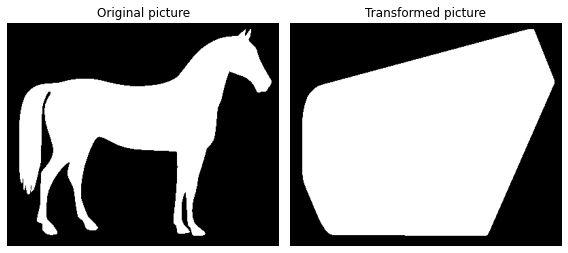

In [72]:
import matplotlib.pyplot as plt
from skimage.morphology import convex_hull_image
from skimage import data, img_as_float
from skimage.util import invert
# The original image is inverted as the object must be white.
image = invert(data.horse())
chull = convex_hull_image(image)
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()
ax[0].set_title('Original picture')
ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_axis_off()
ax[1].set_title('Transformed picture')
ax[1].imshow(chull, cmap=plt.cm.gray)
ax[1].set_axis_off()
plt.tight_layout()
plt.show()

In [76]:
#2-7) 형태 변환(morphological region)
# 2진화로 변환한 이미지로 침식, 팽창, 그래디언트, 오프닝, 클로징등의 작업을 할때 같이 사용한다.
# getStructuringElement(shape, ksize[, anchor]) -> retval
# shape : cv2.MORPH_RECT / cv2.MORPH_ELLIPSE / cv2.MORPH_CROSS

print(cv2.getStructuringElement(cv2.MORPH_RECT,(7,7)))
print(cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7)))
print(cv2.getStructuringElement(cv2.MORPH_CROSS,(7,7)))

[[1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]]
[[0 0 0 1 0 0 0]
 [0 1 1 1 1 1 0]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [0 1 1 1 1 1 0]
 [0 0 0 1 0 0 0]]
[[0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [1 1 1 1 1 1 1]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]]


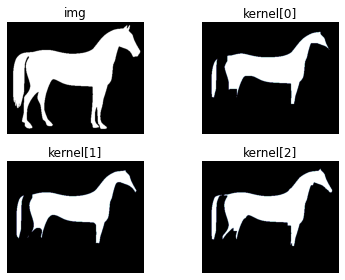

In [84]:
#2-8) 침식 : 각 픽셀에 커널을 적용해서 커널 영여그이 최솟값으로 해당 픽셀을 대처한다.
# 2진화 작업은 0(검정)과 1(흰색)로 이루어 진다.
import matplotlib.pyplot as plt

from skimage.morphology import convex_hull_image
from skimage.data import horse
from skimage.util import invert

img = horse().astype('uint8')
img = np.ones(img.shape) - img

size = (20,20)
kernel = {}
kernel[0] = cv2.getStructuringElement(cv2.MORPH_RECT,size)
kernel[1] = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,size)
kernel[2] = cv2.getStructuringElement(cv2.MORPH_CROSS,size)

title = ["kernel[0]","kernel[1]","kernel[2]"]
#원본이미지
plt.subplot(2,2,1)
plt.imshow(img,cmap = "gray")
plt.axis("off")
plt.title("img")

#침식화 cv2.erode(src, kernel)
for i in range(3):
    res = cv2.erode(img,kernel[i])
    plt.subplot(2,2,i+2)
    plt.imshow(res,cmap = 'bone')
    plt.title(title[i])
    plt.axis("off")
    
plt.tight_layout()
plt.show()

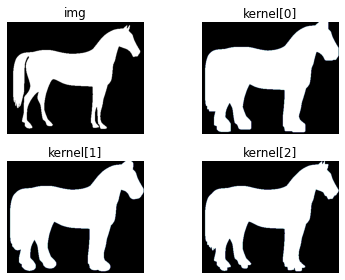

In [85]:
#2-9) 팽창 : 각 픽셀에 커널을 적용해서 커널 영역의 최대값으로 해당 픽셀을 대처한다.
# 2진화 작업은 0(검정)과 1(흰색)로 이루어 진다.
import matplotlib.pyplot as plt

from skimage.morphology import convex_hull_image
from skimage.data import horse
from skimage.util import invert

img = horse().astype('uint8')
img = np.ones(img.shape) - img

size = (20,20)
kernel = {}
kernel[0] = cv2.getStructuringElement(cv2.MORPH_RECT,size)
kernel[1] = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,size)
kernel[2] = cv2.getStructuringElement(cv2.MORPH_CROSS,size)

title = ["kernel[0]","kernel[1]","kernel[2]"]
#원본이미지
plt.subplot(2,2,1)
plt.imshow(img,cmap = "gray")
plt.axis("off")
plt.title("img")

#침식화 cv2.dilate(src, kernel)
for i in range(3):
    res = cv2.dilate(img,kernel[i])
    plt.subplot(2,2,i+2)
    plt.imshow(res,cmap = 'bone')
    plt.title(title[i])
    plt.axis("off")
    
plt.tight_layout()
plt.show()

2-10) 그레디언트 : 팽창으로 확장된 영역 - 침식으로 축소된 영역 = 영역 ----> 윤곽선을 추출
 오프닝 : 침식 -> 팽창을 적용       /      결과 : 적용영역이 둥글게 된다. (점, 작은 물체, 돌기)
 클로즈 : 팽창 -> 침식    :    윤곽 확인

 morphologyEx(src, op, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]]) -> dst
  - op
       cv2.MORPH_OPEN  ->  cv2.dilate(cv2.erode(img))
       cv2.MORPH_CLOSE  ->  cv2.erode(cv2.dilate(img))
       cv2.MORPH_GRADIENT  ->  cv2.dilate() - cv2.erode()
       cv2.MORPH_TOPHAT  ->  opening(img)
       cv2.MORPH_BLACKHAT  -> closing(img)

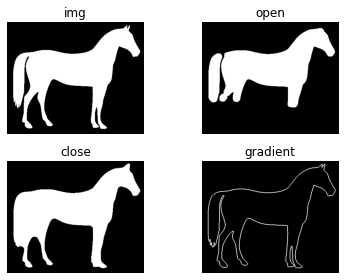

In [87]:
#2-9) 팽창 : 각 픽셀에 커널을 적용해서 커널 영역의 최대값으로 해당 픽셀을 대처한다.
# 2진화 작업은 0(검정)과 1(흰색)로 이루어 진다.
import matplotlib.pyplot as plt

from skimage.morphology import convex_hull_image
from skimage.data import horse
from skimage.util import invert

img = horse().astype('uint8')
img = np.ones(img.shape) - img

size = (20,20)

open = cv2.morphologyEx(img,cv2.MORPH_OPEN,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,size))
close = cv2.morphologyEx(img,cv2.MORPH_CLOSE,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,size))
gradient = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)))

title = ["img","open","close","gradient"]
images = [img, open,close,gradient]

for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i],cmap = 'gray')
    plt.title(title[i])
    plt.axis("off")
    
plt.tight_layout()
plt.show()

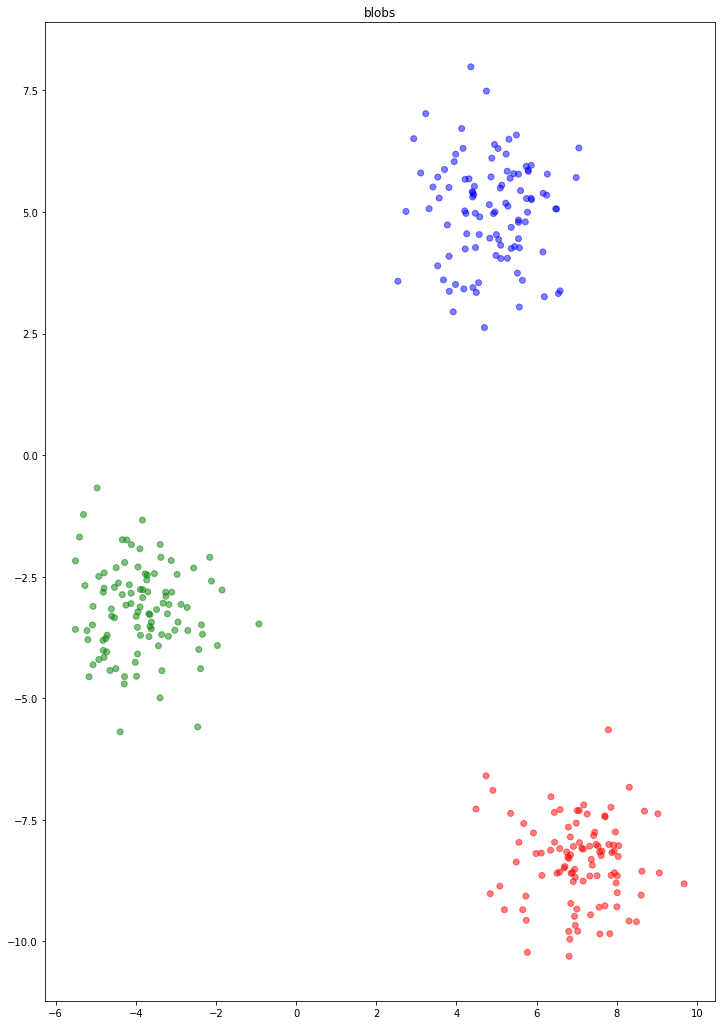

In [95]:
#번외편
import matplotlib.pyplot as plt
from sklearn import datasets
base_color = ["r","g","b","y","k"]
plt.subplots(figsize = (12,18))

data, target = datasets.make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=1.0, center_box= (-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)

colors = [base_color[class_]for class_ in target]

plt.scatter(data.T[0],data.T[1],color = colors,alpha = 0.5)
plt.title("blobs")
plt.show()